<a href="https://colab.research.google.com/github/Hubobv/AI_W4/blob/main/Homework_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bb3ed2bfb0286231641a8d84203e7bf497095ffcab2f4c787b3cd1b6824218f5
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


1.0573717528923816


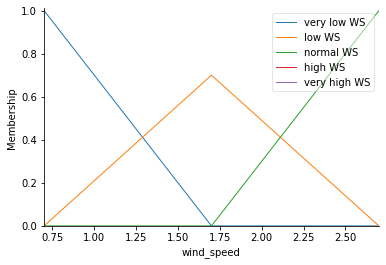

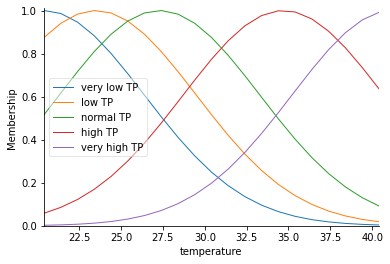

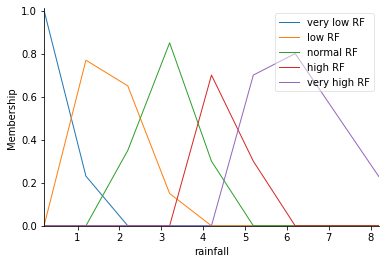

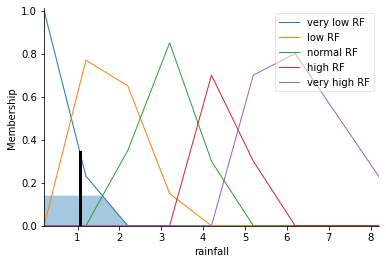

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.7,3.2,1),'wind_speed')
temperature = ctrl.Antecedent(np.arange(20.4,41.3,1),'temperature')

rainfall = ctrl.Consequent(np.arange(0.2,9.2,1),'rainfall')

wind_speed['very low WS'] = fuzz.trimf(wind_speed.universe,[0.7,0.7,1.4])
wind_speed['low WS'] = fuzz.trimf(wind_speed.universe,[0.7,1.4,2.4])
wind_speed['normal WS'] = fuzz.trimf(wind_speed.universe,[2.4,2.7,2.9])
wind_speed['high WS'] = fuzz.trimf(wind_speed.universe,[2.7,2.9,3])
wind_speed['very high WS'] = fuzz.trimf(wind_speed.universe,[2.9,3,3.1])

temperature['very low TP'] = fuzz.gaussmf(temperature.universe,20.4,6)
temperature['low TP'] = fuzz.gaussmf(temperature.universe,23.5,6)
temperature['normal TP'] = fuzz.gaussmf(temperature.universe,27.3,6)
temperature['high TP'] = fuzz.gaussmf(temperature.universe,34.7,6)
temperature['very high TP'] = fuzz.gaussmf(temperature.universe,41.2,6)

rainfall['very low RF'] = fuzz.trimf(rainfall.universe,[0.2,0.2,1.5])
rainfall['low RF'] = fuzz.trimf(rainfall.universe,[0.2,1.5,3.5])
rainfall['normal RF'] = fuzz.trimf(rainfall.universe,[1.5,3.5,4.5])
rainfall['high RF'] = fuzz.trimf(rainfall.universe,[3.5,4.5,5.5])
rainfall['very high RF'] = fuzz.trimf(rainfall.universe,[4.5,5.5,9])

wind_speed.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(wind_speed['very low WS']&temperature['very low TP'],rainfall['very low RF'])
rule2 = ctrl.Rule(wind_speed['low WS']&temperature['low TP'],rainfall['very low RF'])
rule3 = ctrl.Rule(wind_speed['very high WS']&temperature['very high TP'],rainfall['very high RF'])
rule4 = ctrl.Rule(wind_speed['high WS']&temperature['very high TP'],rainfall['high RF'])
rule5 = ctrl.Rule(wind_speed['very high WS']&temperature['normal TP'],rainfall['high RF'])
#Cho may hoc
rainfall_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
rainfalling = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfalling.input['wind_speed']=2.5
rainfalling.input['temperature']=26
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)

9.0


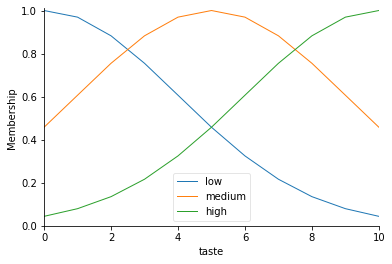

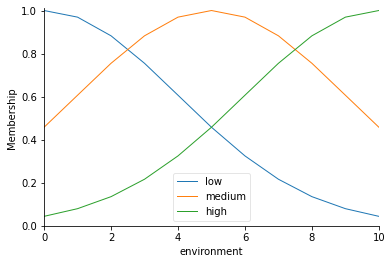

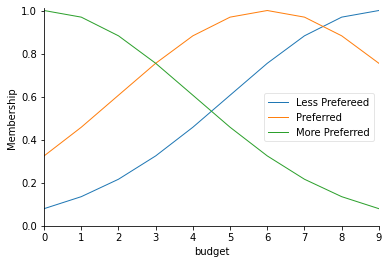

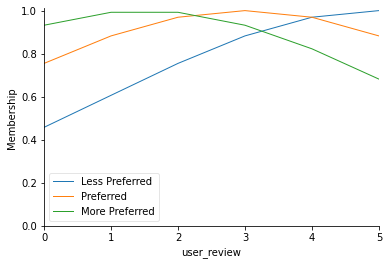

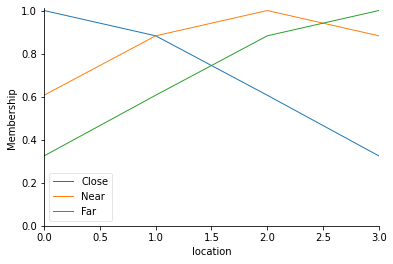

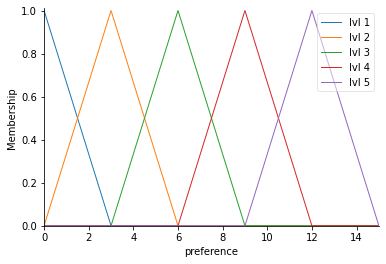

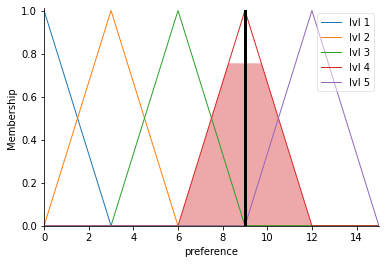

In [ ]:
from matplotlib.pyplot import close
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,11,1),'taste')
environment = ctrl.Antecedent(np.arange(0,11,1),'environment')
budget = ctrl.Antecedent(np.arange(0,10,1),'budget')
location = ctrl.Antecedent(np.arange(0,4,1),'location')
user_review = ctrl.Antecedent(np.arange(0,6,1),'user_review')
preference = ctrl.Consequent(np.arange(0,16,1),'preference')

taste['low'] = fuzz.gaussmf(taste.universe,0,4)
taste['medium'] = fuzz.gaussmf(taste.universe,5,4)
taste['high'] = fuzz.gaussmf(taste.universe,10,4)

environment['low'] = fuzz.gaussmf(environment.universe,0,4)
environment['medium'] = fuzz.gaussmf(environment.universe,5,4)
environment['high'] = fuzz.gaussmf(environment.universe,10,4)

budget['Less Prefereed'] = fuzz.gaussmf(budget.universe,9,4)
budget['Preferred'] = fuzz.gaussmf(budget.universe,6,4)
budget['More Preferred'] = fuzz.gaussmf(budget.universe,0,4)

user_review['Less Preferred'] = fuzz.gaussmf(user_review.universe,5,4)
user_review['Preferred'] = fuzz.gaussmf(user_review.universe,3,4)
user_review['More Preferred'] = fuzz.gaussmf(user_review.universe,1.5,4)

location['Close'] = fuzz.gaussmf(location.universe,0,2)
location['Near'] = fuzz.gaussmf(location.universe,2,2)
location['Far'] = fuzz.gaussmf(location.universe,3,2)

preference['lvl 1'] = fuzz.trimf(preference.universe,[0,0,3])
preference['lvl 2'] = fuzz.trimf(preference.universe,[0,3,6])
preference['lvl 3'] = fuzz.trimf(preference.universe,[3,6,9])
preference['lvl 4'] = fuzz.trimf(preference.universe,[6,9,12])
preference['lvl 5'] = fuzz.trimf(preference.universe,[9,12,15])

taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

rule1 = ctrl.Rule(taste['medium']&environment['low']&budget['More Preferred']&location['Close']&user_review['Less Preferred'],preference['lvl 4'])

preference_ctrl= ctrl.ControlSystem([rule1])
preferencing = ctrl.ControlSystemSimulation(preference_ctrl)

preferencing.input['taste']=2
preferencing.input['environment']=2
preferencing.input['budget']=2
preferencing.input['location']=1
preferencing.input['user_review']=3
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)

